# FERRAMENTAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("raw_datas/Censo 2022 - Crescimento Populacional - mescla.csv", sep=";")

# EXPLORAÇÃO DOS DADOS

In [3]:
# verificando as primeiras linhas do data fame
df.head()

,ano_da_pesquisa,populacao(pessoas),UF
0,1872,NaN,Acre
1,1890,NaN,Acre
2,1900,NaN,Acre
3,1920,92379.0,Acre
4,1940,79768.0,Acre


In [4]:
# verificando os tipos do dataframe
df.dtypes

ano_da_pesquisa         int64
populacao(pessoas)    float64
UF                     object
dtype: object

In [5]:
# verificando se há valores nulos
df.isnull().sum()

ano_da_pesquisa        0
populacao(pessoas)    32
UF                     0
dtype: int64

In [6]:
"""
    Alguns anos não possui valor de população,
    ou seja, não teve censo. Com isso, estes valores irei configurá-los para 0
"""
df['populacao(pessoas)'] = df['populacao(pessoas)'].fillna(0)

In [7]:
# verificando se foi corrigido os valores nulos
df.isnull().sum()

ano_da_pesquisa       0
populacao(pessoas)    0
UF                    0
dtype: int64

In [8]:
# vendo algumas cálculos estatísticos do dataframe
df.describe()

,ano_da_pesquisa,populacao(pessoas)
count,351.000000,3.510000e+02
mean,1954.230769,3.312813e+06
std,45.904880,5.499379e+06
min,1872.000000,0.000000e+00
25%,1920.000000,3.295480e+05
50%,1960.000000,1.383445e+06
75%,1991.000000,3.635324e+06
max,2022.000000,4.441124e+07


In [9]:
# verificando se há algum dado duplicado
df.duplicated().sum()

np.int64(0)

In [10]:
df

,ano_da_pesquisa,populacao(pessoas),UF
0,1872,0.0,Acre
1,1890,0.0,Acre
2,1900,0.0,Acre
3,1920,92379.0,Acre
4,1940,79768.0,Acre
...,...,...,...
346,1980,738688.0,Tocantins
347,1991,920116.0,Tocantins
348,2000,1157690.0,Tocantins
349,2010,1383445.0,Tocantins


In [11]:
# calcular crescimento populacional por ano
df_crescimento = df.groupby('ano_da_pesquisa')['populacao(pessoas)'].sum().reset_index()

# pct_change o calculo de crescimento em porcentagem.
# ex.: x - y = z -> z / x = proporção de crescimento.
df_crescimento['crescimento populacional'] = df_crescimento['populacao(pessoas)'].pct_change() * 100
df_crescimento

,ano_da_pesquisa,populacao(pessoas),crescimento populacional
0,1872,9930478.0,NaN
1,1890,14333915.0,44.342649
2,1900,17438434.0,21.658556
3,1920,30635605.0,75.678648
4,1940,41236315.0,34.602581
5,1950,51944397.0,25.967602
6,1960,70992343.0,36.669876
7,1970,94508583.0,33.125037
8,1980,121150573.0,28.190022
9,1991,146917459.0,21.268481


# Visualização de dados

Text(0, 0.5, 'População')

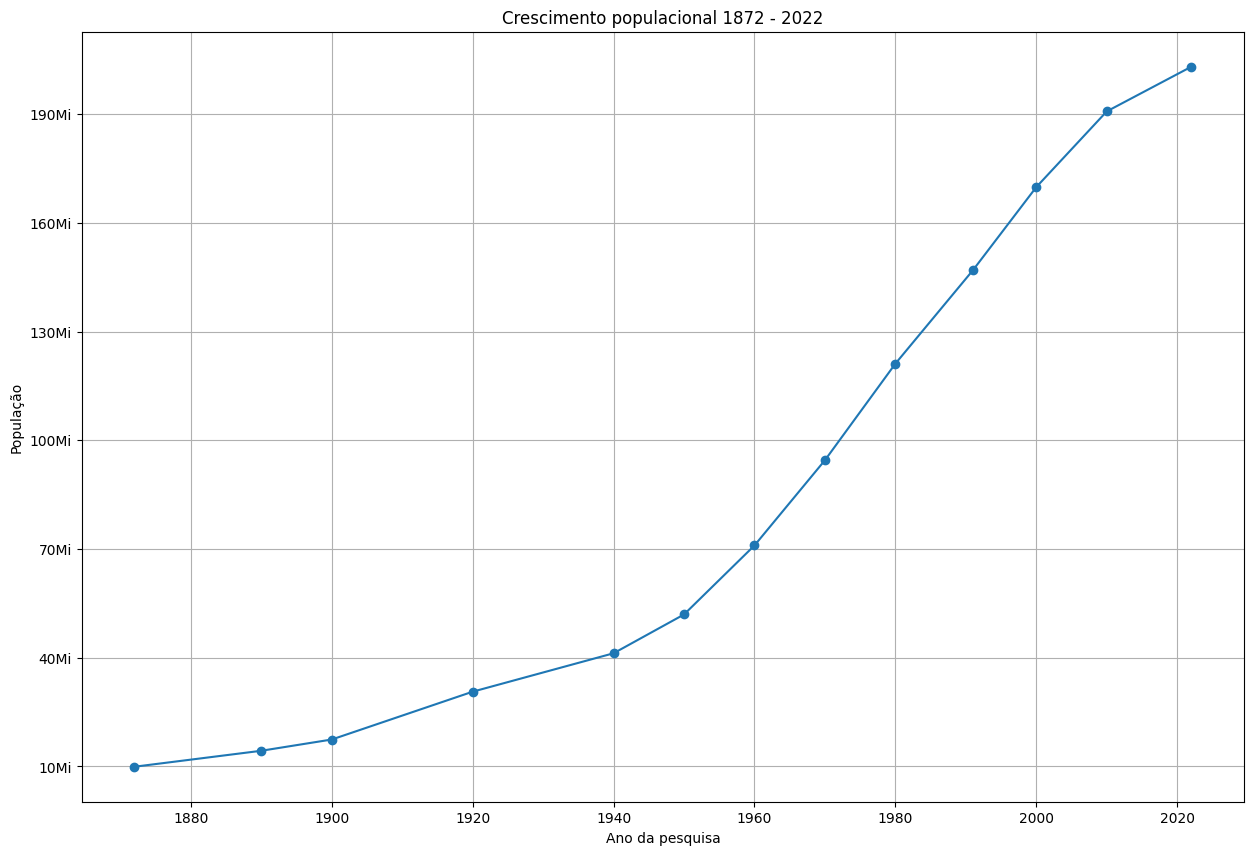

In [59]:
plt.figure(figsize=(15, 10))

# label para y
valor_y = np.arange(10e6, 220e6, 30e6)

# plotar dados
plt.plot(df_crescimento['ano_da_pesquisa'], df_crescimento['populacao(pessoas)'], marker='o')

# nomeando o eixo y e passando format para tirar valor decimal
plt.yticks(valor_y, [ format(val / 1e6, '.0f') + 'Mi' for val in valor_y])


plt.grid(True)
plt.title('Crescimento populacional 1872 - 2022')
plt.xlabel('Ano da pesquisa')
plt.ylabel('População')
